<a href="https://colab.research.google.com/github/pjcroxas/Talent-Retention-in-Railway-Workforce/blob/main/Talent_Retention_in_Railway_Workforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
import matplotlib.ticker as mtick
from matplotlib import style
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"

In [3]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"
retention_df = pd.read_excel(dir+"/talent-retention-dataset.xlsx")
retention_df.sample(3)

,Age,Sex,HighestEducationalAttainment,YearsofService,Occupation,Organization,NatureofEmployment,JF1,JF2,JL1,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
86,56-60,Male,Bachelor's Degree,6-10 Years,Train driver,Metro Rail Transit 3 (DOTr-MRT3),Contractual,3,4,3,...,2,4,3,3,2,3,2,4,2,3
110,51-55,Male,Bachelor's Degree,21-25 Years,Government Employee,Metro Rail Transit 3 (DOTr-MRT3),Contractual,3,3,3,...,4,3,3,2,2,3,1,3,4,2
174,31-35,Female,Bachelor's Degree,6-10 Years,Ticket Seller 3,Metro Rail Transit 3 (DOTr-MRT3),Contractual,4,4,2,...,3,3,4,3,4,3,3,4,3,3


# **Data Inspection**

In [4]:
retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           282 non-null    object
 1   Sex                           282 non-null    object
 2   HighestEducationalAttainment  282 non-null    object
 3   YearsofService                282 non-null    object
 4   Occupation                    281 non-null    object
 5   Organization                  282 non-null    object
 6   NatureofEmployment            282 non-null    object
 7   JF1                           282 non-null    int64 
 8   JF2                           282 non-null    int64 
 9   JL1                           282 non-null    int64 
 10  JL2                           282 non-null    int64 
 11  JS1                           282 non-null    int64 
 12  JS2                           282 non-null    int64 
 13  CF1                 

### Defining the Talent Retention Questionnaire

1. `Talent Management` - refers to the general practices in the human resources industry to management ideal workforce or people in an organization. This includes trainings, social and monetary benefits, talent pipeline and career pathway etc.

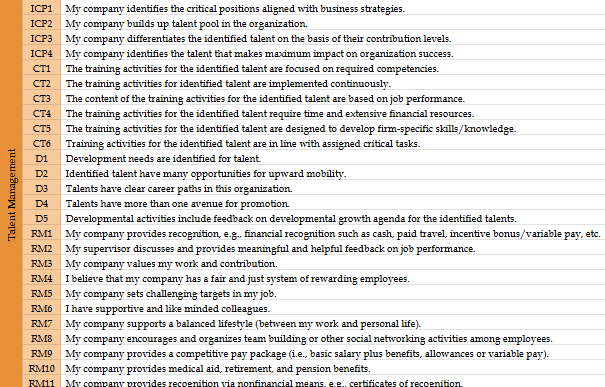

2. `Job Embeddedness` - This refers to the quality perceived by the employees in an organization.


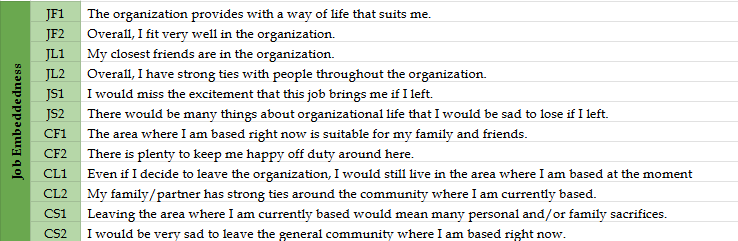

3. `Employee Retention` - this refers to the intention of an employee whether leaving or staying in an organization.

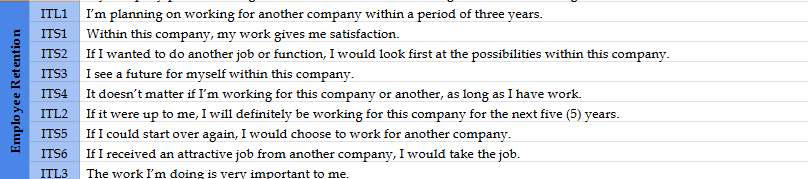

# **Data Preparation**

In [5]:
retention_df["HighestEducationalAttainment"].unique()

array(["Bachelor's Degree", "Associate's Degree/Vocational/Diploma",
       "Master's Degree", 'High School (Before K-12)'], dtype=object)

In [6]:
def rename_education(value):
  # This function will shorten the name
  # of educational attainment.
  if value == "Bachelor's Degree":
    return "Bachelor"
  elif value == "Master's Degree":
    return "Master"
  elif value == "Postgraduate":
    return "Postgraduate"
  elif value == "Associate's Degree/Vocational/Diploma":
    return "Associate"
  else:
    return "High School"

retention_df["Education"] = retention_df["HighestEducationalAttainment"].apply(rename_education)

In [7]:
retention_df["YearsofService"].unique()

array(['11-15 Years', '16-20 Years', '6-10 Years', '1-5 Years',
       '21-25 Years', '26-30 Years'], dtype=object)

In [8]:
def remove_character(value, character):
  return value.replace(character, "")

retention_df["Tenure"] = retention_df["YearsofService"].apply(remove_character, character="Years")

In [9]:
retention_df["NatureofEmployment"].unique()

array(['Permanent', 'Contractual', 'Job Order/Contract of Service'],
      dtype=object)

In [10]:
def shorten_emp_type(value):
  if value == "Job Order/Contract of Service":
    return "JO/COS"
  elif value == "Permanent":
    return "RR"
  elif value == "Contractual":
    return "CT"
  else:
    return None

retention_df["Employee_type"] = retention_df["NatureofEmployment"].apply(shorten_emp_type)

In [11]:
retention_df.Organization.unique()

array(['Light Rail Transit Authority (LRTA)',
       'Metro Rail Transit 3 (DOTr-MRT3)'], dtype=object)

In [12]:
def shorten_org(value):
  if value == "Light Rail Transit Authority (LRTA)":
    return "LRTA"
  elif value == "Metro Rail Transit 3 (DOTr-MRT3)":
    return "MRT3"
  else:
    return None

retention_df["Railway_Operator"] = retention_df["Organization"].apply(shorten_org)

In [13]:
retention_df["Occupation"].unique()

array(['Government Employee', 'Tranport operations Supervisor B',
       'Transport Operations Supervisor B', 'Train Driver A',
       'Government employee', 'Train driver', 'GOVERNMENT EMPLOYEE',
       'Safety Specialist', 'Train Driver', 'Train driver A', nan,
       'train driver A', 'Employee', 'Train Drive',
       'Transport operations supervisor', 'Cso B',
       'Traansport Operations Supervisor B', 'Civil Security Officer',
       'CSO B', 'Lrta employee', 'Civil Security Officer B',
       'Civil Security Officer -B', 'Transport Operation Supervisor B',
       'Driver', 'Transport Officer A', 'Gov. Employee',
       'Transport officer  A', 'Toa', 'TRANSPORT OFFICER A',
       'Govt Employee', 'Transport officer A', 'STDO', 'train driver',
       'Train Deiver', 'Transport Operations', 'SUPERVISOR',
       'Transport supervisor', 'LRTA Employee', 'Transport Supervisor',
       'DOTr MRT3 TRAIN DRIVER', 'Train Driver/Operator',
       'Senior transportation development officer

In [14]:
def classify_job_level(position):
    if isinstance(position, str):
      position = position.lower()  # Convert to lowercase for case-insensitive matching
      if "supervisor" in position or " a" in position:
          return "Managerial"
      elif "senior" in position or "iii" in position or "3" in position or "stdo" in position or "b" in position:
          return "Senior"
      elif "c" in position:
          return "Junior"
      else:
          return "Junior"
    else:
      return "Unknown"

retention_df["Job Level"] = retention_df["Occupation"].apply(classify_job_level)

In [15]:
retention_prepped_df = retention_df.drop(columns=["HighestEducationalAttainment", "YearsofService", "NatureofEmployment", "Organization", "Occupation"])
retention_prepped_df.sample(3)

,Age,Sex,JF1,JF2,JL1,JL2,JS1,JS2,CF1,CF2,...,ITS4,ITL2,ITS5,ITS6,ITL3,Education,Tenure,Employee_type,Railway_Operator,Job Level
242,46-50,Male,4,4,3,4,3,4,3,3,...,3,3,3,3,3,Associate,16-20,CT,MRT3,Junior
14,26-30,Male,5,5,5,5,5,5,5,5,...,5,5,5,5,5,Bachelor,1-5,CT,LRTA,Managerial
2,36-40,Male,4,5,3,4,5,4,3,3,...,3,3,5,5,4,Bachelor,11-15,CT,LRTA,Managerial


# **EDA: Demographics**

### **Univariate Analysis**

In [16]:
style.use("ggplot")
def plot_univariate(feature, plot_type, dim=[10, 5], angle=0, color="orange", data=retention_df):
  plt.figure(figsize=dim)
  count = data[feature].value_counts().sort_values(ascending=False)

  if plot_type == "pie":
    ax = count.plot(kind=plot_type, autopct='%1.1f%%', startangle=90, ylabel="", figsize=(6,6))

  else:
    ax = count.plot(kind=plot_type, color=color)
    xlabels = ax.get_xticklabels()
    sum = data[feature].value_counts().sum()
    for i, v in enumerate(count):
      ax.text(i, v, f"{v}\n({v/sum:.1%})", ha="center", fontsize=9)  # 1% format
      ax.set_xticklabels(xlabels, rotation=angle, ha='right')

Text(0.5, 0, 'Age Range')

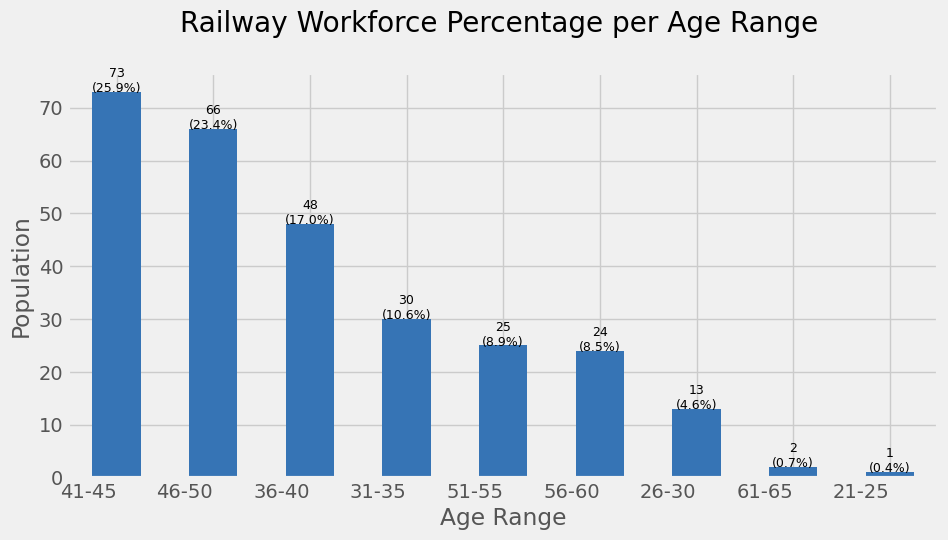

In [17]:
style.use("fivethirtyeight")
plot_univariate("Age", "bar", color="#3674B5")
plt.title("Railway Workforce Percentage per Age Range \n")
plt.ylabel("Population")
plt.xlabel("Age Range")

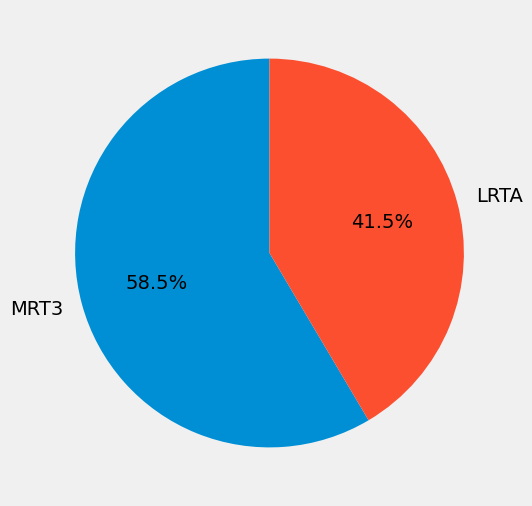

In [18]:
style.use("fivethirtyeight")
plot_univariate("Railway_Operator", "pie")

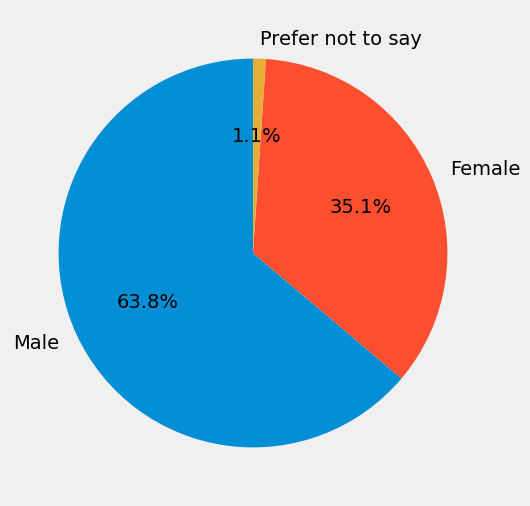

In [19]:
style.use("fivethirtyeight")
plot_univariate("Sex", "pie")

Text(0.5, 0, 'Education')

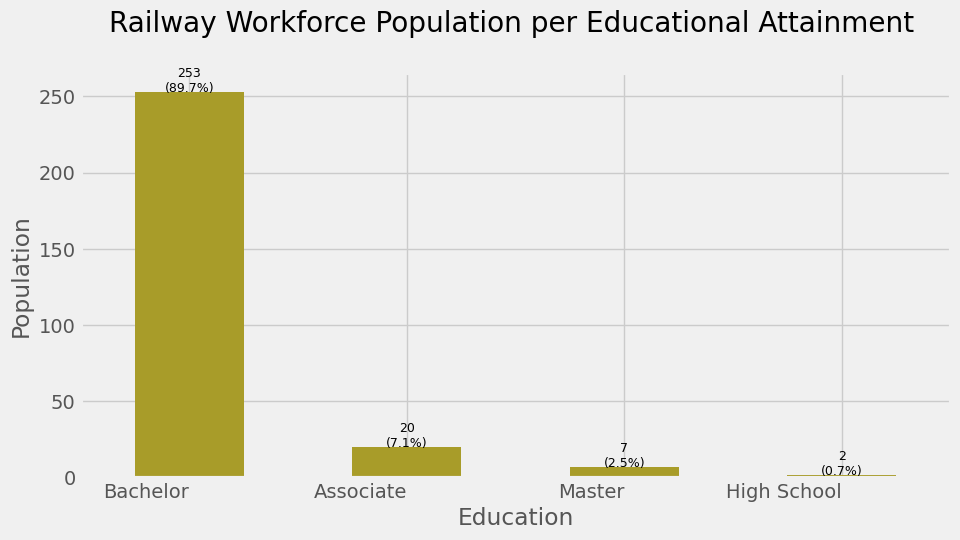

In [20]:
style.use("fivethirtyeight")
plot_univariate("Education", "bar", color="#A89C29")
plt.title("Railway Workforce Population per Educational Attainment \n")
plt.ylabel("Population")
plt.xlabel("Education")

Text(0.5, 0, 'Years of Service')

<Figure size 1000x600 with 0 Axes>

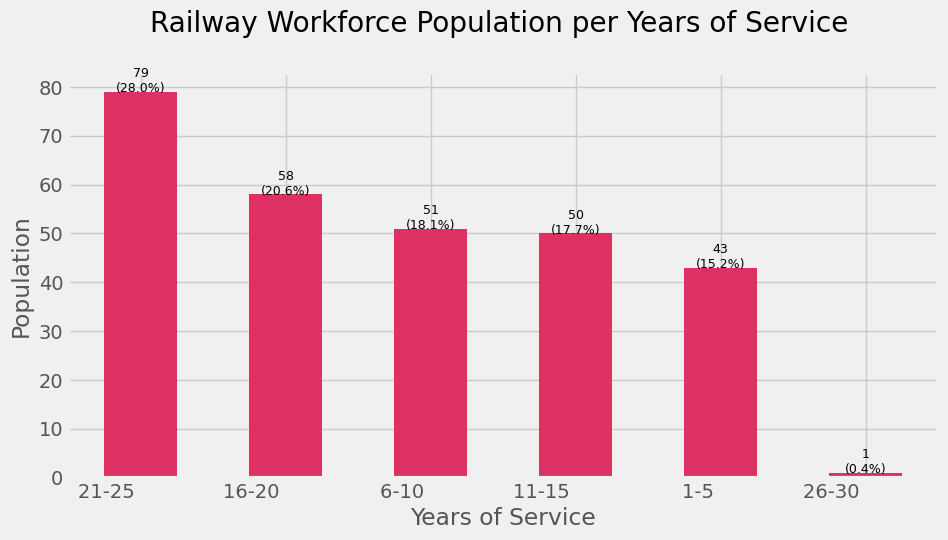

In [21]:
# retention_df["YearsofService"].value_counts().sum()
plt.figure(figsize=(10,6))
style.use("fivethirtyeight")
plot_univariate("Tenure", "bar", angle=0, color="#DE3163")
plt.title("Railway Workforce Population per Years of Service \n")
plt.ylabel("Population")
plt.xlabel("Years of Service")

Text(0, 0.5, 'Population')

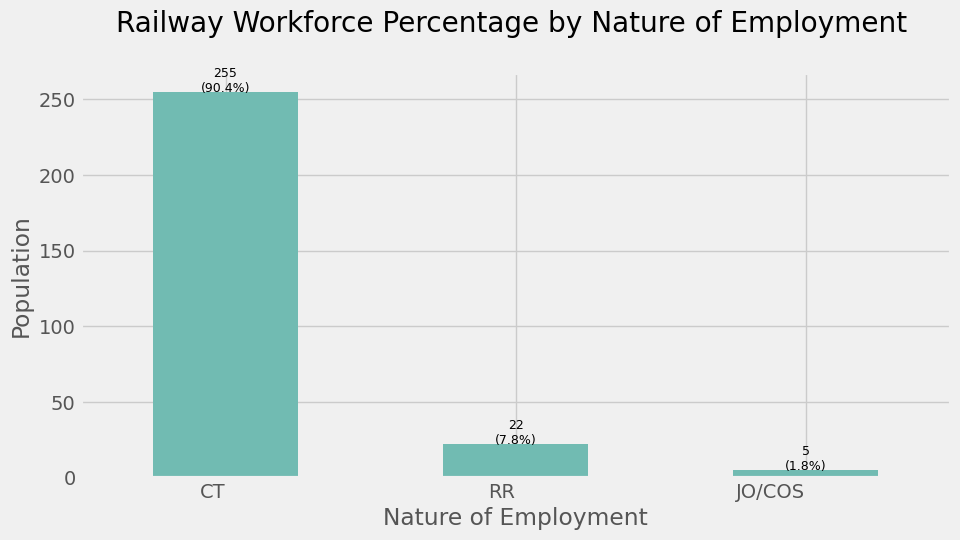

In [22]:
style.use("fivethirtyeight")
plot_univariate("Employee_type", "bar", color="#71BBB2")
plt.xlabel("Nature of Employment")
plt.title("Railway Workforce Percentage by Nature of Employment \n")
plt.ylabel("Population")

**Insights**
  1.
  2.
  3.

# **EDA: Gender vs Social Features**

In [23]:
def plot_sex_distrib(feature, data=retention_df):
  gender_employment_nature = retention_df.groupby(["Sex", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="Sex", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    if height == 0:
      return None
    else:
      ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                  (p.get_x() + p.get_width() / 2., height),  # Positioning
                  ha='center', va='bottom', fontsize=10, color='black')

Text(0, 0.5, 'Population')

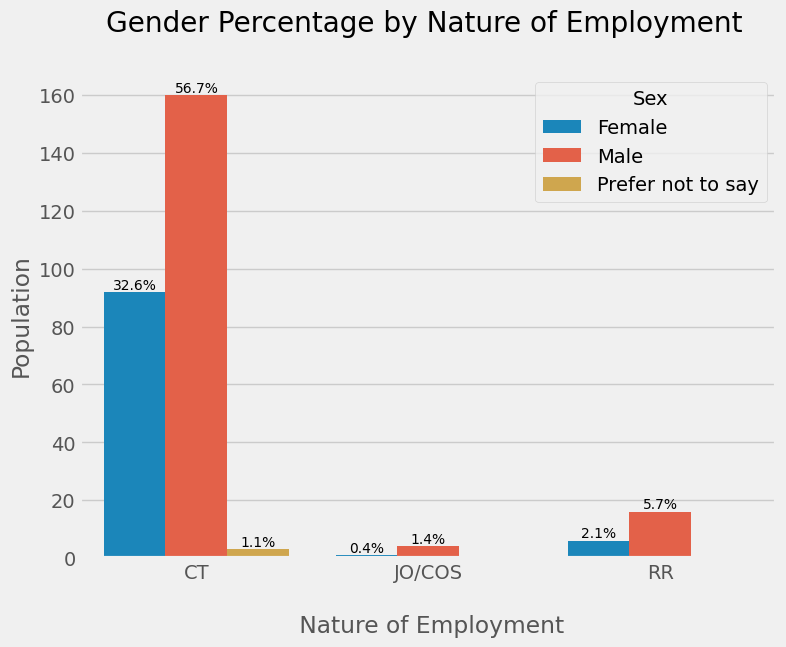

In [24]:
style.use("fivethirtyeight")
plot_sex_distrib("Employee_type")
plt.title("Gender Percentage by Nature of Employment \n")
plt.xlabel("\n Nature of Employment")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

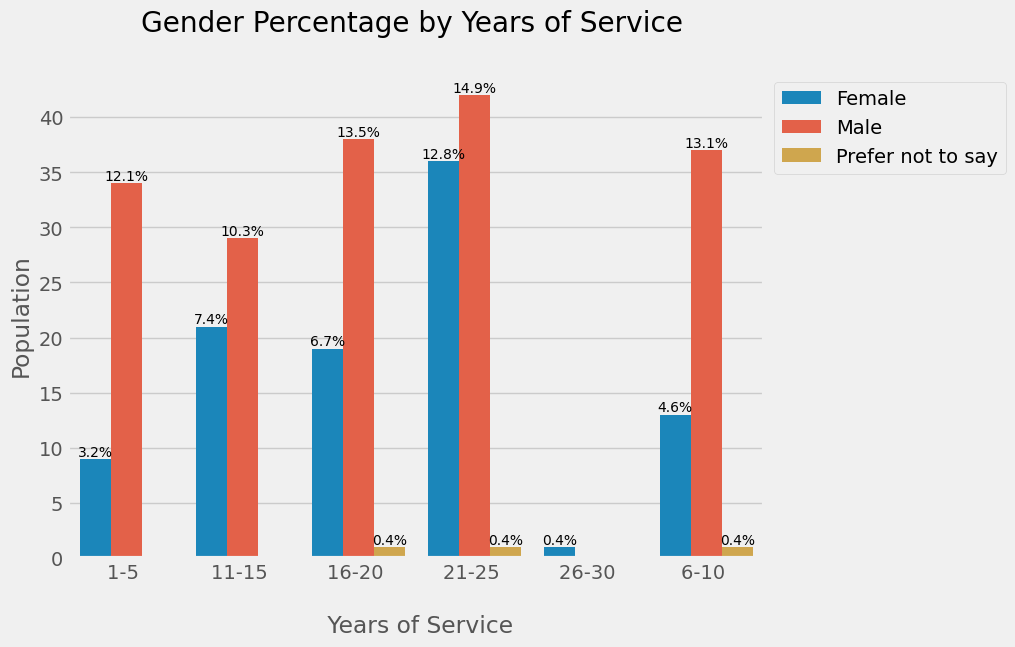

In [25]:
plot_sex_distrib("Tenure")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Years of Service \n")
plt.xlabel("\n Years of Service")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

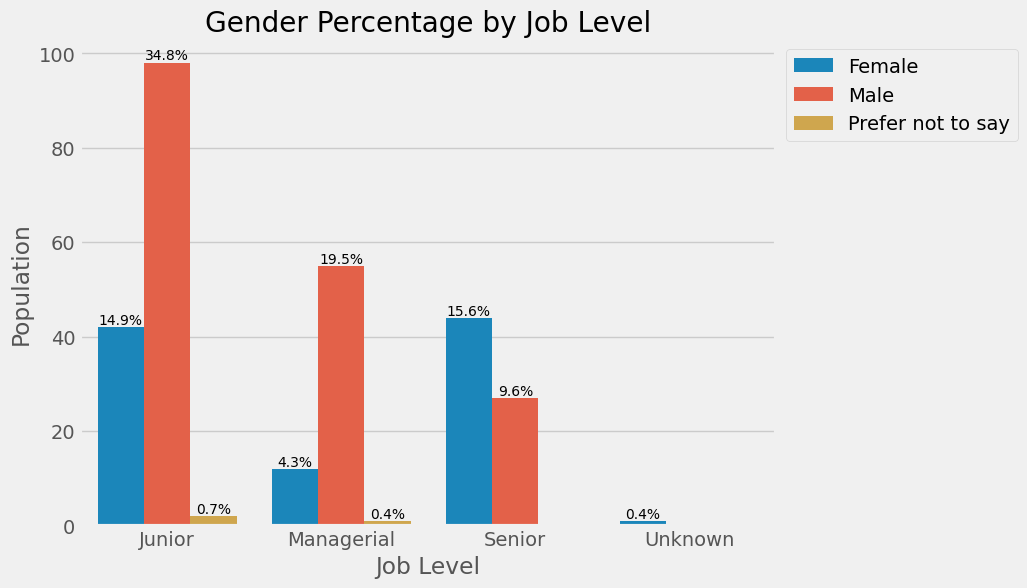

In [26]:
plot_sex_distrib("Job Level")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

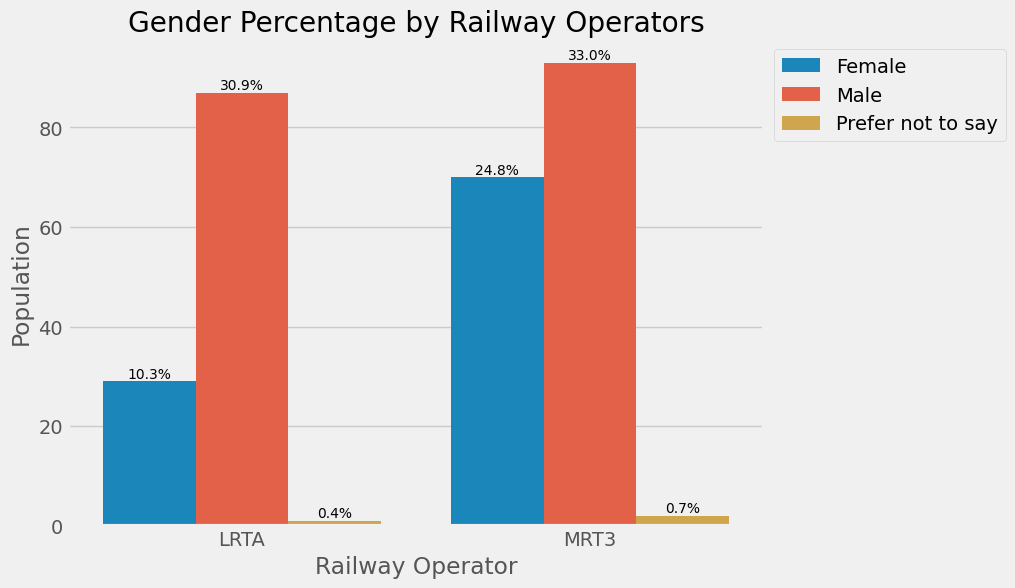

In [27]:
plot_sex_distrib("Railway_Operator")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Railway Operators")
plt.xlabel("Railway Operator")
plt.ylabel("Population")

Text(0.5, 1.0, 'Gender Percentage by Educational Level \n')

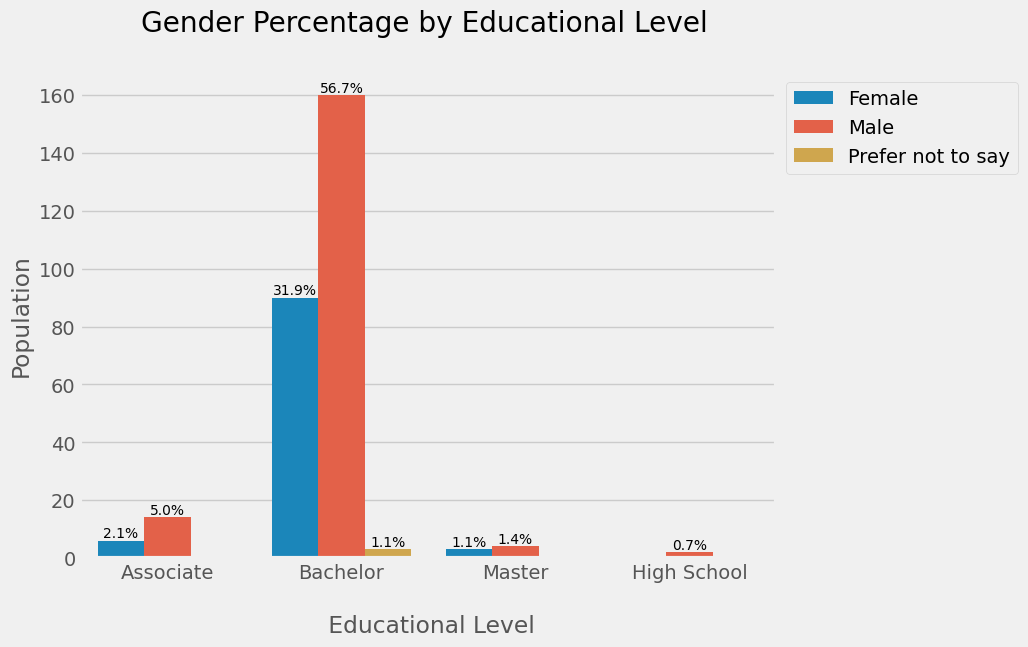

In [28]:
plot_sex_distrib("Education")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Population")
plt.xlabel("\n Educational Level")
plt.title("Gender Percentage by Educational Level \n")

### **Education vs Social Features**

In [29]:
def plot_educ_distrib(feature, data=retention_df):
  gender_employment_nature = retention_prepped_df.groupby(["Education", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="Education", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    if height == 0:
      return None
    else:
      ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                  (p.get_x() + p.get_width() / 2., height),  # Positioning
                  ha='center', va='bottom', fontsize=10, color='black')

Text(0, 0.5, 'Population')

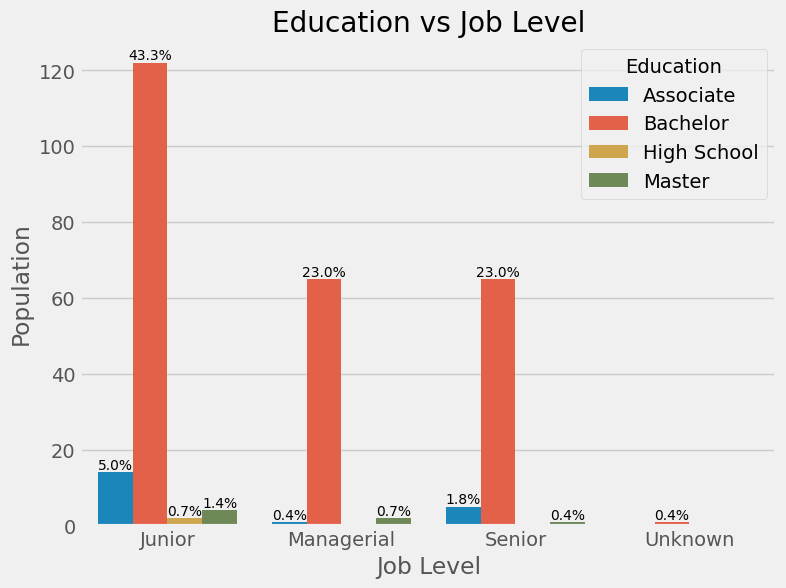

In [30]:
plot_educ_distrib("Job Level")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Education vs Job Level")
plt.xlabel("Job Level")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

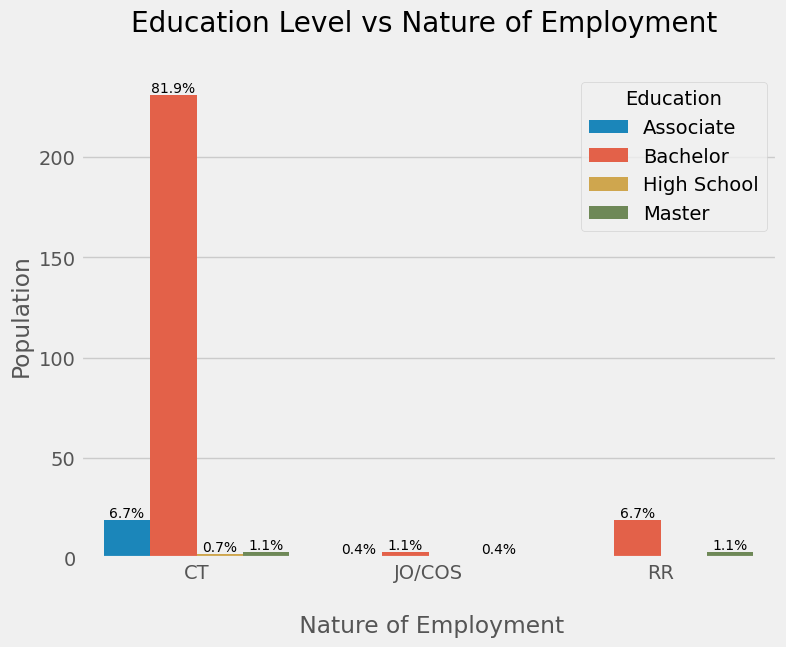

In [31]:
plot_educ_distrib("Employee_type")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Education Level vs Nature of Employment \n")
plt.xlabel("\n Nature of Employment")
plt.ylabel("Population")

In [32]:
retention_prepped_df

,Age,Sex,JF1,JF2,JL1,JL2,JS1,JS2,CF1,CF2,...,ITS4,ITL2,ITS5,ITS6,ITL3,Education,Tenure,Employee_type,Railway_Operator,Job Level
0,36-40,Male,3,4,2,3,3,3,3,3,...,3,3,3,3,3,Bachelor,11-15,RR,LRTA,Junior
1,46-50,Male,4,5,5,4,5,5,5,4,...,3,3,5,5,3,Bachelor,16-20,CT,LRTA,Managerial
2,36-40,Male,4,5,3,4,5,4,3,3,...,3,3,5,5,4,Bachelor,11-15,CT,LRTA,Managerial
3,46-50,Male,5,4,5,5,4,5,5,4,...,3,3,5,5,3,Bachelor,16-20,CT,LRTA,Managerial
4,26-30,Male,5,5,4,4,5,4,4,4,...,5,3,5,5,3,Bachelor,6-10,CT,LRTA,Managerial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,46-50,Female,3,3,3,3,3,4,4,4,...,3,3,3,3,4,Bachelor,21-25,CT,MRT3,Managerial
278,36-40,Male,4,4,3,3,4,4,3,3,...,4,2,4,4,5,Bachelor,11-15,CT,MRT3,Managerial
279,46-50,Female,4,4,3,4,4,4,4,4,...,5,4,5,5,4,Associate,21-25,CT,MRT3,Senior
280,41-45,Female,4,4,3,4,4,4,4,3,...,4,3,4,4,4,Bachelor,11-15,CT,MRT3,Senior


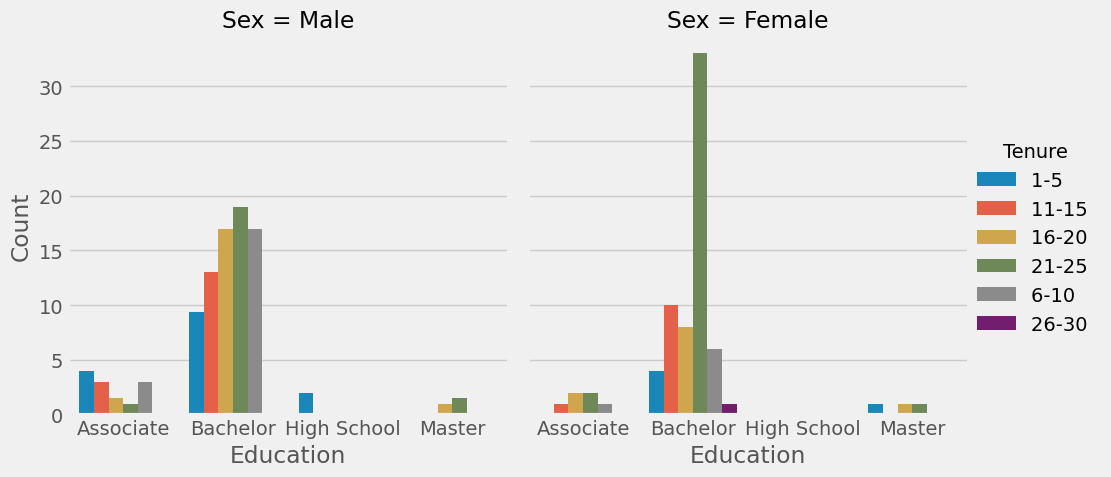

In [33]:
emp_educ_years = retention_prepped_df.groupby(["Employee_type", "Education", "Tenure", "Sex"]).count()["Job Level"].reset_index()
emp_educ_years.rename(columns={"Job Level":"Count"}, inplace=True)
emp_educ_years = emp_educ_years[(emp_educ_years["Sex"]=="Female") | (emp_educ_years["Sex"]=="Male")]
style.use("fivethirtyeight")
fig = sns.catplot(emp_educ_years,
                  x="Education",
                  hue="Tenure",
                  y="Count",
                  kind="bar",
                  # height=4
                  ci=False,
                  col="Sex")
# plt.xlabel("Population")

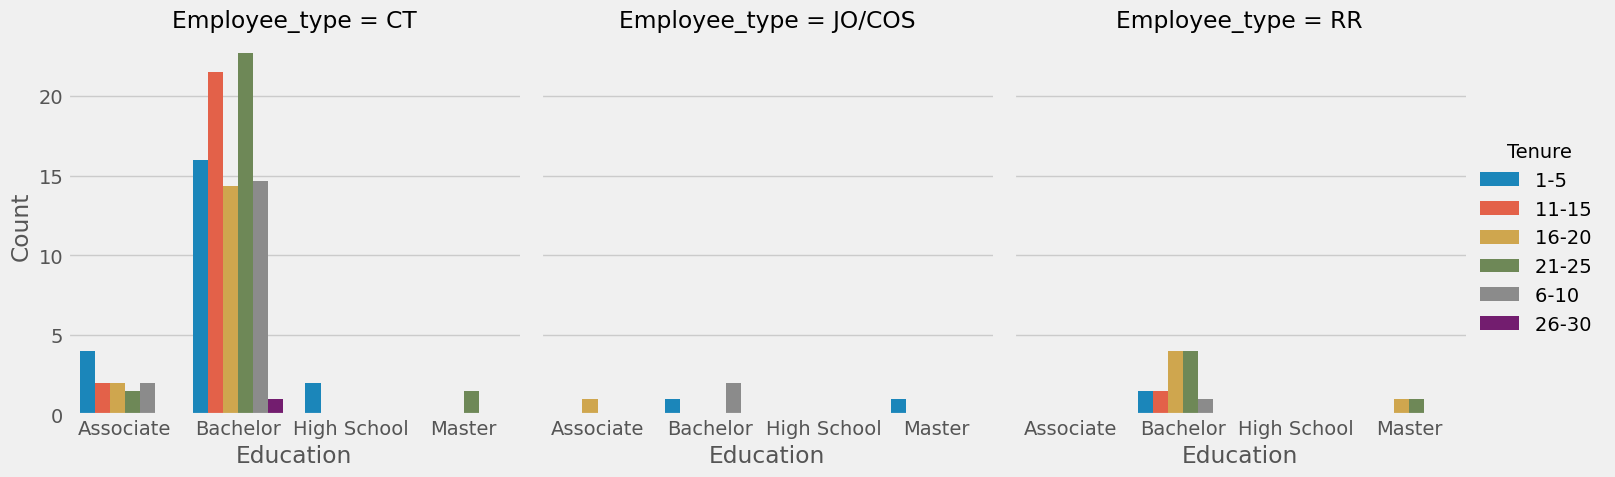

In [34]:
emp_educ_years = retention_prepped_df.groupby(["Employee_type", "Education", "Tenure", "Sex"]).count()["Job Level"].reset_index()
emp_educ_years.rename(columns={"Job Level":"Count"}, inplace=True)
style.use("fivethirtyeight")
fig = sns.catplot(emp_educ_years,
                  x="Education",
                  col="Employee_type",
                  y="Count",
                  kind="bar",
                  ci=False,
                  # height=4, aspect=.8, col_wrap=8,
                  hue="Tenure")

# **Feature Engineering**

In order to proceed to Machine Learning Modeling, we have to encode or label our talent retention responses. As we can see, the responses are in the form of likert scale numbers, whereas 5 represents `greatly agree`, 4 as `agree`, 3 as `neutral`, 2 as `disagree`, and 1 as `greatly disagree`. To minimize the variability and bias between this responses, we will create a simple binary classification such as that:
- `1` will represent 5 and 4, that can be translated to high opinion.
- `0` will represent 3, 2, and 1, that can be translated to low opinion.

we include 3 or neutral to low opinion because the latter represent that lack of opinion to the question given.

### **Binary Encoding of Talent Retention Features**

In [35]:
def convert_scale(value):
  if (value == 5) or (value == 4):
    return 1
  elif (value == 3) or (value == 2) or (value == 1):
    return 0
  else:
    return 0

In [36]:
retention_features = retention_prepped_df[['JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3']]

# create a new dataframe for talent retention responses
ret_feat_process = retention_features.applymap(convert_scale)
ret_feat_process.head()

,JF1,JF2,JL1,JL2,JS1,JS2,CF1,CF2,CL1,CL2,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,1,1,0
2,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,0,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,0


### **One-hot encoding of demographic features**

In [37]:
gender = pd.get_dummies(retention_df["Sex"])
age = pd.get_dummies(retention_df["Age"])
nature = pd.get_dummies(retention_df["Employee_type"])
educ = pd.get_dummies(retention_df["Education"])
years = pd.get_dummies(retention_df["Tenure"])
joblvl = pd.get_dummies(retention_df["Job Level"])

In [38]:
# Combine the TR features and demograohics
new_ret_df = pd.concat([gender, age, nature, educ, years, joblvl, ret_feat_process], axis=1)
new_ret_df.sample(3)

,Female,Male,Prefer not to say,21-25,26-30,31-35,36-40,41-45,46-50,51-55,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
155,False,True,False,False,False,False,True,False,False,False,...,1,0,1,1,1,1,0,1,1,0
109,False,True,False,False,False,False,False,True,False,False,...,1,0,1,1,1,1,0,1,1,0
200,True,False,False,False,False,False,False,True,False,False,...,1,1,0,1,1,1,0,1,1,1


# **Modeling: Talent Management Level Clustering**

In this part, we will create a cluster modeling using the Talent Management features to create a new feature that will represent all talent management features for our final predictive model. We will test the result of this TM cluster to the Job Embeddedness Classes.

In [39]:
# import kmeans and dbscan
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### **Elbow Method**

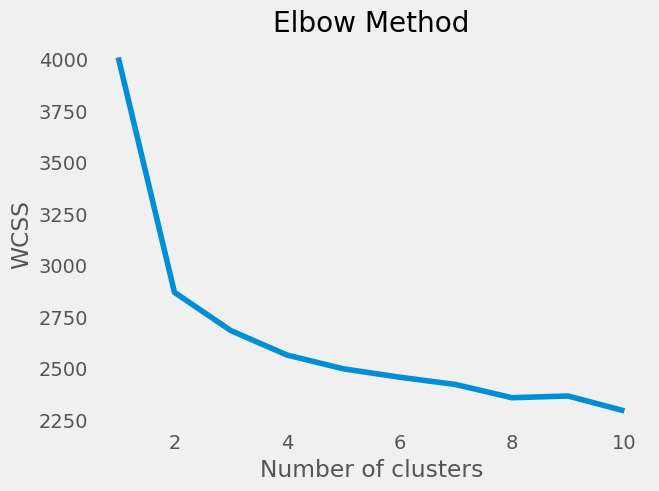

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_ret_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- optimal number of clusters is 2. Since the elbow started at 2 in x-axis.

### **K-Means Clustering**

In [41]:
# Fit kmeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(new_ret_df)
new_ret_df["kmeans_grp"] = y_kmeans

### **Label Encoding of Job Embeddedness Features**

In [42]:
# Create new dataframe for Job Embeddedness Features
JE_df = pd.DataFrame({})

# Data Reduction
# Job Embeddedness Feat Engineering
JE_df["JF"] = ret_feat_process["JF1"] + ret_feat_process["JF2"]
JE_df["JL"] = ret_feat_process["JL1"] + ret_feat_process["JL2"]
JE_df["JS"] = ret_feat_process["JS1"] + ret_feat_process["JS2"]
JE_df["CF"] = ret_feat_process["CF1"] + ret_feat_process["CF2"]
JE_df["CL"] = ret_feat_process["CL1"] + ret_feat_process["CL2"]
JE_df["CS"] = ret_feat_process["CS1"] + ret_feat_process["CS2"]

# # JE Class encoded
# retention_preprocess['JE_dep'] = retention_preprocess[['JF', 'JL', 'JS', 'CF', 'CL', 'CS']].astype(str).apply(lambda x: ''.join(x), axis=1)

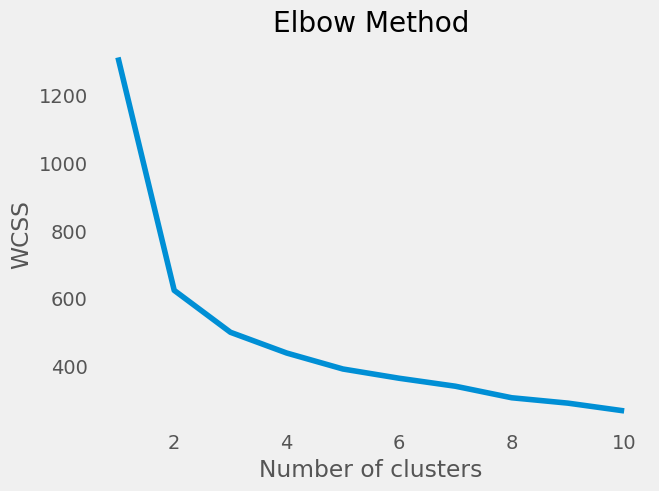

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(JE_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
# Fit kmeans
kmeans_JE = KMeans(n_clusters=2, init='k-means++', random_state=42)
JE_clstr = kmeans_JE.fit_predict(JE_df)
new_ret_df["JE_clstr"] = JE_clstr

### **Test significance between TM and JE clusters**

In [45]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.6 MB/s eta 0:00:00


In [46]:
# chi-square test of independence between JE_cat and kmeans_grp using pingouin
# signifance or alpha = 0.05
import pingouin as pg
exp, obs, stats = pg.chi2_independence(new_ret_df, x='JE_clstr', y='kmeans_grp')
# print()
pd.DataFrame(stats[stats['test'] == 'pearson'])

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,91.81852,1.0,9.500120e-22,0.570612,1.0


*disclaimer: This is a chatgpt generated insights.*

1. `lambda`: This may refer to an effect size measure or parameter, but the exact interpretation depends on your statistical software. If set to 1.0, it might indicate standard Chi-Square behavior.

2. `chi2` (Chi-Square statistic): The value 91.81852 is the test statistic computed for the test. A higher value indicates a stronger deviation from the null hypothesis of independence.

3. `dof (Degrees of Freedom)`: The degrees of freedom for the test is 1. This depends on the size of the contingency table, calculated as
(
𝑟
−
1
)
(
𝑐
−
1
)
(r−1)(c−1), where
𝑟
r and
𝑐
c are the number of rows and columns in the table.

4. `pval (P-value)`: The p-value is 9.500120e-22, or essentially < 0.0001. This is extremely small, meaning there is overwhelming evidence to reject the null hypothesis that job embeddedness class and talent management class are independent.

5. `cramer (Cramér’s V)`: The value 0.570612 indicates the strength of the association between the two variables. Cramér’s V ranges from 0 (no association) to 1 (perfect association). A value of ~0.57 suggests a moderate to strong association.

6. `power`: The value 1.0 indicates that the test has very high statistical power, meaning the probability of correctly rejecting a false null hypothesis is virtually 100%.

### **TM Level vs Demographics**

In [47]:
def decode_cluster(value):
  if value == 1:
    return "High"
  else:
    return "Low"

new_ret_df["JE Level"] = new_ret_df["JE_clstr"].apply(decode_cluster)
new_ret_df["TM Level"] = new_ret_df["kmeans_grp"].apply(decode_cluster)

In [48]:
retention_prepped_df["JE Level"] = new_ret_df["JE Level"]
retention_prepped_df["TM Level"] = new_ret_df["TM Level"]

Text(659.2206553819445, 0.5, 'Population')

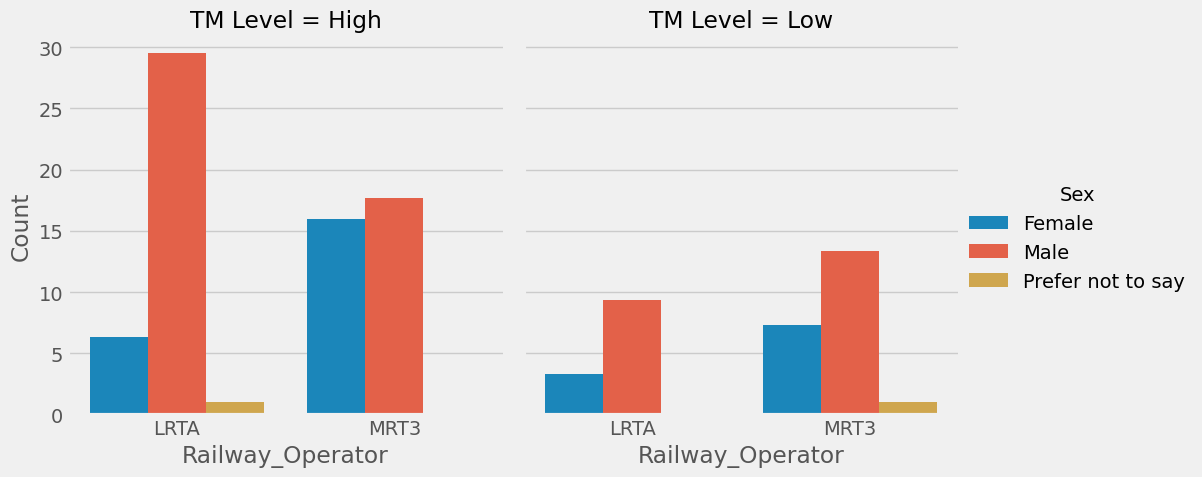

In [49]:
JE_gender_org = retention_prepped_df.groupby(["Sex",
                                      "Railway_Operator",
                                      "TM Level",
                                      "Job Level"]).count()["Age"].reset_index(name="Count")
sns.catplot(JE_gender_org,
            x="Railway_Operator",
            y="Count",
            hue="Sex",
            col="TM Level",
            # row="Job Level",
            kind="bar",
            ci=False)
plt.ylabel("Population")

Text(635.5600480324076, 0.5, 'Population')

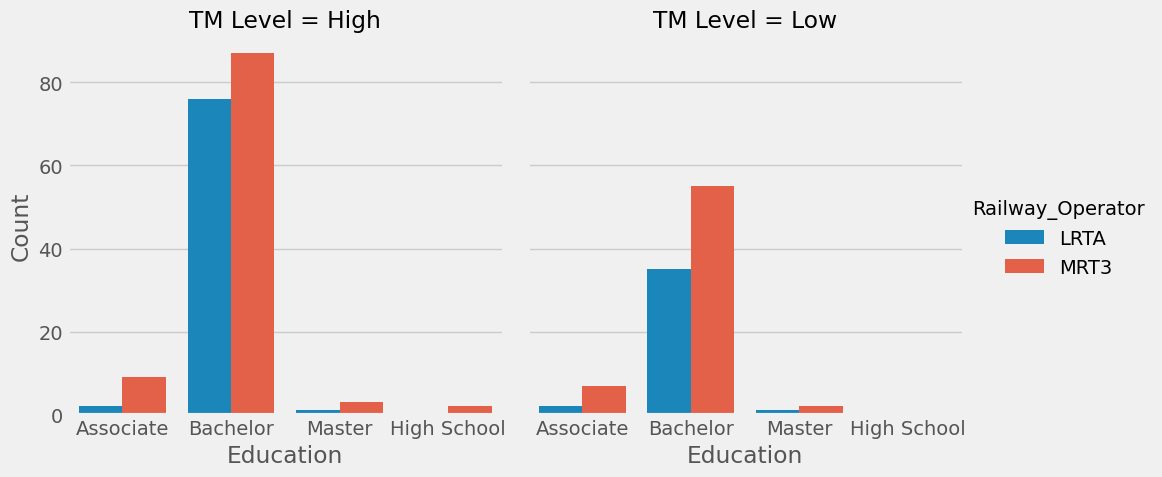

In [50]:
JE_gender_org = retention_prepped_df.groupby(["Railway_Operator",
                                      "Education",
                                      "TM Level"]).count()["Age"].reset_index(name="Count")

sns.catplot(JE_gender_org,
            y="Count",
            x="Education",
            col="TM Level",
            hue="Railway_Operator",
            kind="bar")
plt.ylabel("Population")

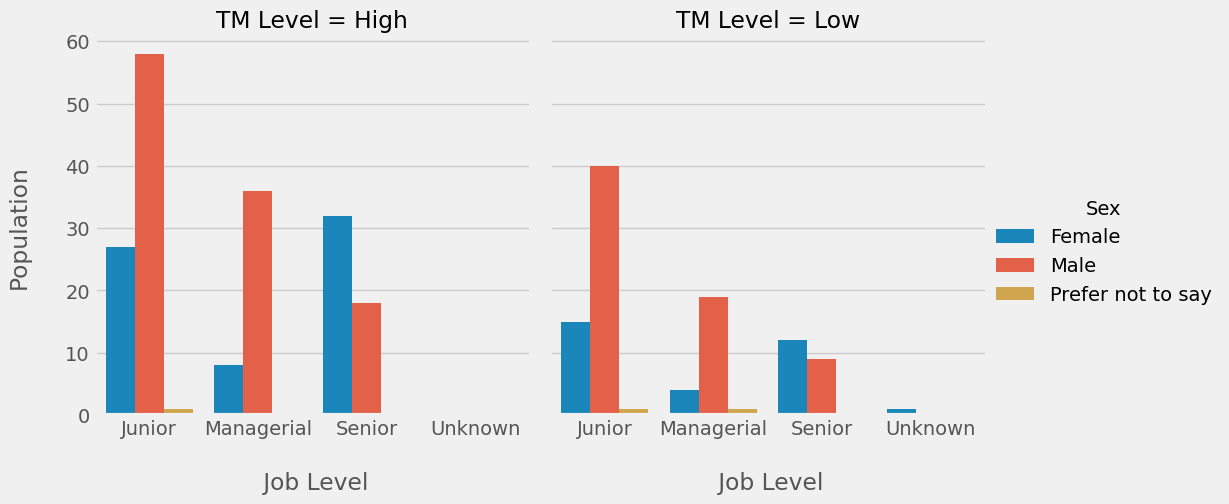

In [51]:
JE_sex = retention_prepped_df.groupby(["Sex",
                               "TM Level",
                               "Job Level"]).count()["Age"].reset_index(name="Count")
# style.use("default")
fig = sns.catplot(JE_sex,
            x="Job Level",
            y="Count",
            hue="Sex",
            col="TM Level",
            kind="bar")
fig.set_ylabels("Population \n")
fig.set_xlabels("\n Job Level")

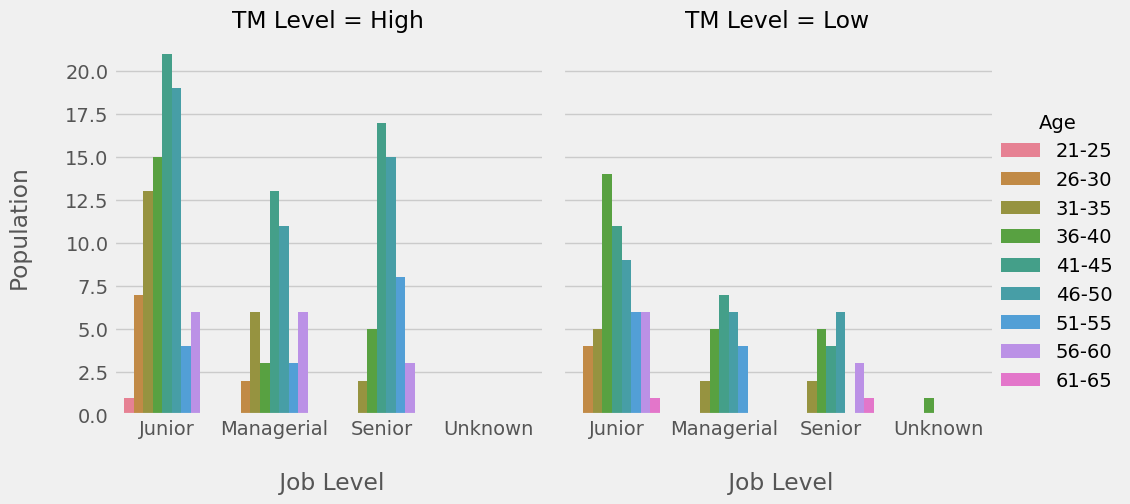

In [52]:
JE_age = retention_prepped_df.groupby(["Age",
                               "TM Level",
                               "Job Level"]).count()["Sex"].reset_index(name="Count")
style.use("fivethirtyeight")
fig = sns.catplot(JE_age,
            x="Job Level",
            y="Count",
            hue="Age",
            col="TM Level",
            kind="bar")

fig.set_ylabels("Population \n")
fig.set_xlabels("\n Job Level")

Text(0.5, 44.000000000000014, 'Job Level')

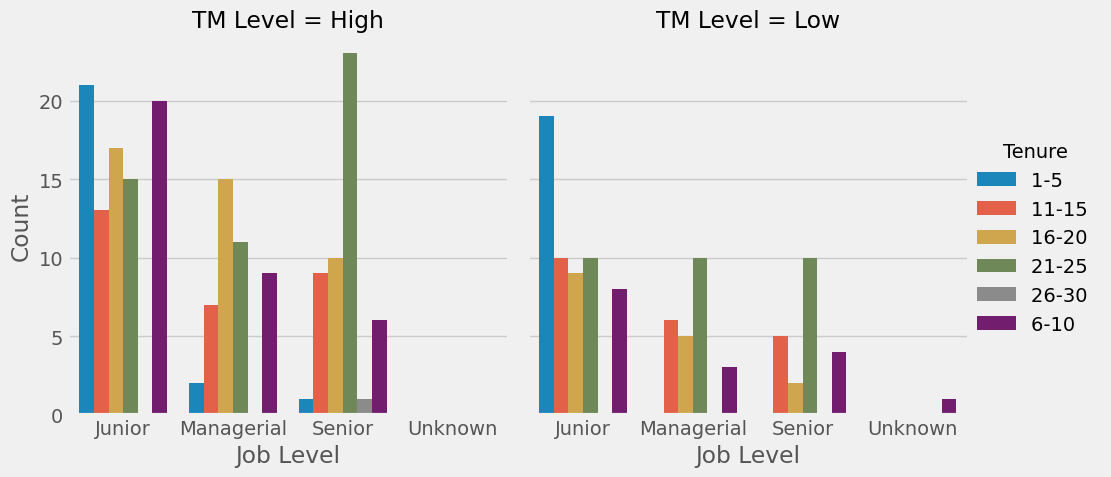

In [53]:
JE_tenure = retention_prepped_df.groupby(["Tenure",
                               "TM Level",
                               "Job Level"]).count()["Sex"].reset_index(name="Count")
style.use("fivethirtyeight")
sns.catplot(JE_tenure,
            x="Job Level",
            y="Count",
            hue="Tenure",
            col="TM Level",
            kind="bar")

plt.ylabel("Population")
plt.xlabel("Job Level")

# **Target Encoding: Employee Retention**

In [54]:
new_ret_df.columns

Index(['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'CT', 'JO/COS',
       'RR', 'Associate', 'Bachelor', 'High School', 'Master', '1-5 ',
       '11-15 ', '16-20 ', '21-25 ', '26-30 ', '6-10 ', 'Junior', 'Managerial',
       'Senior', 'Unknown', 'JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1',
       'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1', 'ICP2', 'ICP3', 'ICP4',
       'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5',
       'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7', 'RM8', 'RM9', 'RM10',
       'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4', 'ITL2', 'ITS5', 'ITS6',
       'ITL3', 'kmeans_grp', 'JE_clstr', 'JE Level', 'TM Level'],
      dtype='object')

In [55]:
def compute_likelihood_to_leave(df, col1_name, col2_name, col3_name):
    """
    Analyzes three columns of a DataFrame and returns a new column based on the criteria.

    Args:
      df: The input DataFrame.
      col1_name: The name of the first column.
      col2_name: The name of the second column.
      col3_name: The name of the third column.

    Returns:
      A pandas Series representing the new column with the results.
    """

    results = []
    for index, row in df.iterrows():
        col1_val = row[col1_name]
        col2_val = row[col2_name]
        col3_val = row[col3_name]

        ones_count = sum([col1_val == 1, col2_val == 1, col3_val == 1])
        zeros_count = sum([col1_val == 0, col2_val == 0, col3_val == 0])

        if ones_count >= 2:
            results.append(1)
        elif zeros_count >= 2:
            results.append(0)
        else:
          results.append(1) # Handle cases where neither condition is met

    return pd.Series(results)

In [56]:
# create new feature as a target variable: Likelihood to leave
new_ret_df["llh_to_leave"] = compute_likelihood_to_leave(new_ret_df, 'ITL1', 'ITS5', 'ITS6')

In [57]:
new_ret_df["llh_to_leave"].value_counts().reset_index()

,llh_to_leave,count
0,1,198
1,0,84


In [58]:
# new_ret_df.groupby(["TM Level", "JE Level", "llh_to_leave"]).count()["Male"].reset_index().rename(columns={"Male":"Count"})

In [59]:
def chi_square_test(df, x, y):
  exp, obs, stats = pg.chi2_independence(df, x=x, y=y)
  # print()
  return pd.DataFrame(stats[stats['test'] == 'pearson'])

In [60]:
print(chi_square_test(new_ret_df, x="JE Level", y="llh_to_leave"))

      test  lambda       chi2  dof          pval    cramer  power
0  pearson     1.0  63.007121  1.0  2.059606e-15  0.472683    1.0


A p-value of 2.059e-15 suggest the dependence between the `Job Embeddedness Level` and `Likelihood to leave classes`.

# **Predictive Analysis**

In [61]:
# Import API for ML classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
import pydot
from imblearn.over_sampling import SMOTE

In [62]:
new_ret_df.columns

Index(['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'CT', 'JO/COS',
       'RR', 'Associate', 'Bachelor', 'High School', 'Master', '1-5 ',
       '11-15 ', '16-20 ', '21-25 ', '26-30 ', '6-10 ', 'Junior', 'Managerial',
       'Senior', 'Unknown', 'JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1',
       'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1', 'ICP2', 'ICP3', 'ICP4',
       'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5',
       'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7', 'RM8', 'RM9', 'RM10',
       'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4', 'ITL2', 'ITS5', 'ITS6',
       'ITL3', 'kmeans_grp', 'JE_clstr', 'JE Level', 'TM Level',
       'llh_to_leave'],
      dtype='object')

In [137]:
# Define Target and observed variables
X = new_ret_df[['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'CT', 'JO/COS',
       'RR', 'Associate', 'Bachelor', 'High School', 'Master', '1-5 ',
       '11-15 ', '16-20 ', '21-25 ', '26-30 ', '6-10 ', 'Junior', 'Managerial',
       'Senior', 'Unknown', 'JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1',
       'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ITS1', 'kmeans_grp', 'JE_clstr']]

X.rename(columns={'kmeans_grp': 'TM Level',
                  'JE_clstr': 'JE Level'}, inplace=True)

y = new_ret_df["llh_to_leave"]

# SMOTE
method = SMOTE()
X_resample, y_resample = method.fit_resample(X, y)

# Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

<ipython-input-137-26c52cb559eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'kmeans_grp': 'TM Level',


### **Decision Tree Classifier**

In [138]:
# Fit and predict Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=10,random_state=42)
dt_model.fit(X_train, y_train)
dt_JE_pred = dt_model.predict(X_test)

### **Random Forest Classifier**

In [139]:
# Fit and predict Random Forest Classifier model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train, y_train)
rfc_JE_pred = rfc_model.predict(X_test)

### **Naive Bayes Classifier**

In [140]:
# Fit and predict Bayesian Classifier model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_JE_pred = gnb_model.predict(X_test)

### **KNN Classifier**

In [141]:
# Fit KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_JE_pred = knn_model.predict(X_test)

### **Logistic Regression**

In [142]:
# Fit Logistic Regression
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logreg_model.fit(X_train, y_train)
logreg_JE_pred = logreg_model.predict(X_test)

### **Extreme Gradient Boosted Tree**

In [143]:
# Fit and predict Gradient Boosted Classifier model
xgb_model = XGBClassifier(max_depth=5,
                          learning_rate=0.05,
                          n_estimators=1000,
                          gamma=10,
                          min_child_weight=1,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          reg_alpha=0.0005,
                          early_stopping_rounds=3)

xgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              verbose=False)
xgb_JE_pred = xgb_model.predict(X_test)

### **Accuracy Score**

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix
dt_ac_score = accuracy_score(y_test, dt_JE_pred)
rfc_ac_score = accuracy_score(y_test, rfc_JE_pred)
gnb_ac_score = accuracy_score(y_test, gnb_JE_pred)
knn_ac_score = accuracy_score(y_test, knn_JE_pred)
logreg_ac_score = accuracy_score(y_test, logreg_JE_pred)
xgb_ac_score = accuracy_score(y_test, xgb_JE_pred)

print("Accuracy Score")
print("Decision Tree: ", dt_ac_score)
print("Random Forest: ", rfc_ac_score)
print("Naive Bayes: ", gnb_ac_score)
print("KNN: ", knn_ac_score)
print("Logistic Regression: ", logreg_ac_score)
print("XGBoost: ", xgb_ac_score)

Accuracy Score
Decision Tree:  0.8625
Random Forest:  0.8625
Naive Bayes:  0.75
KNN:  0.8375
Logistic Regression:  0.8875
XGBoost:  0.8375


In [145]:
def get_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  return pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

In [146]:
# Performance of Logistic Regression
get_confusion_matrix(y_test, logreg_JE_pred)

,Predicted 0,Predicted 1
Actual 0,36,4
Actual 1,5,35


In [147]:
# Performance of Random Forest
get_confusion_matrix(y_test, rfc_JE_pred)

,Predicted 0,Predicted 1
Actual 0,34,6
Actual 1,5,35


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_JE_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.90      0.88      0.89        40

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



In [149]:
print(classification_report(y_test, rfc_JE_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.85      0.88      0.86        40

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



In [150]:
# Logistic Regression Accuracy Score
logreg_train_score = logreg_model.score(X_train, y_train)
logreg_test_score = logreg_model.score(X_test, y_test)

print("Training Score: ", logreg_train_score)
print("Testing Score: ", logreg_test_score)

Training Score:  0.8955696202531646
Testing Score:  0.8875


In [151]:
# Random Forest Accuracy Score
rfc_train_score = rfc_model.score(X_train, y_train)
rfc_test_score = rfc_model.score(X_test, y_test)

print("Training Score: ", rfc_train_score)
print("Testing Score: ", rfc_test_score)

Training Score:  0.9936708860759493
Testing Score:  0.8625


For `Logistic Regression`
- The model demonstrates balanced and reliable performance across both classes.
- It has high precision, recall, and F1-scores for both classes, indicating that it performs well at identifying both positive and negative instances.
- A 2% overfitting is evident from the training and testing scores.

# **Model Interpretation**

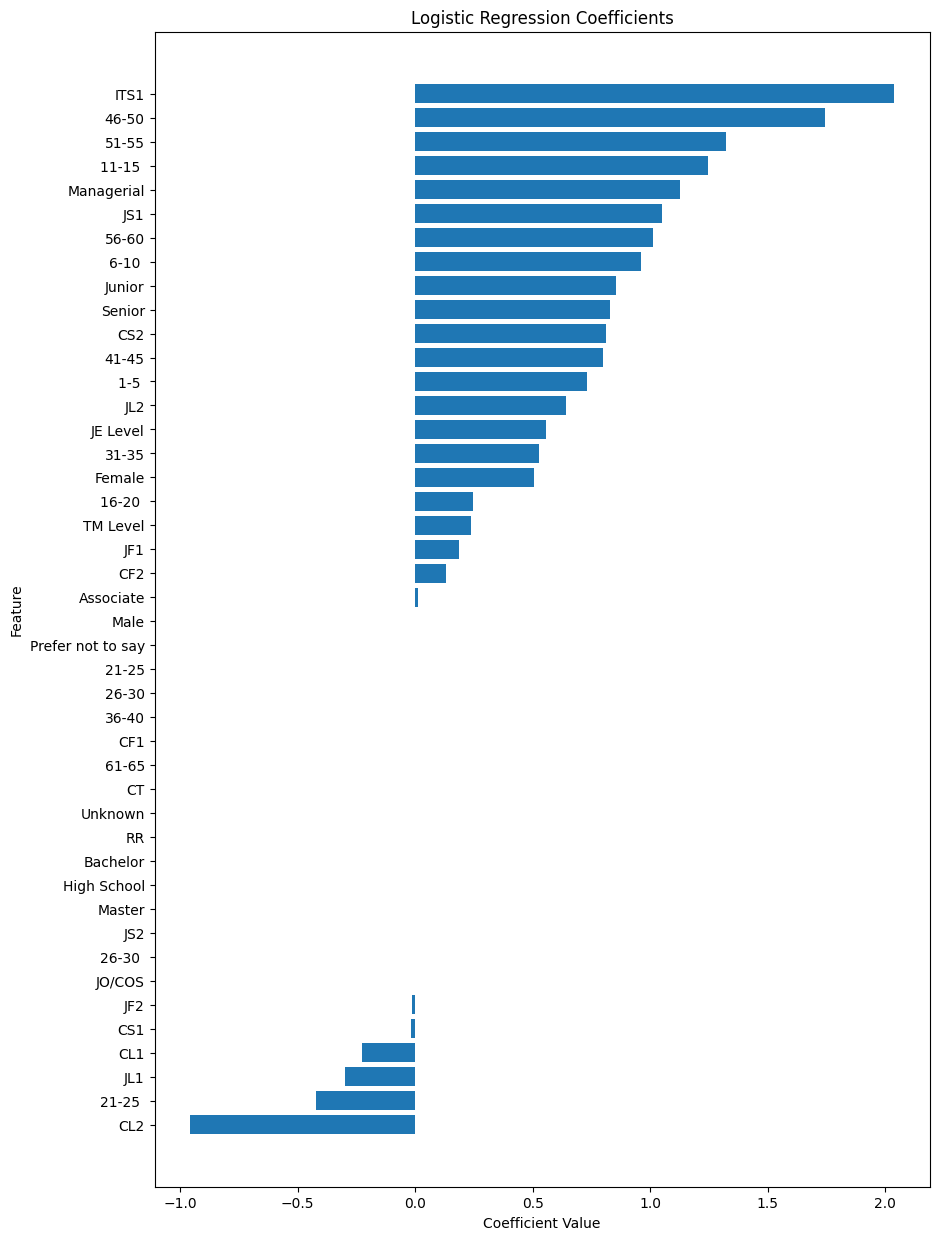

In [153]:
model_interpretation = pd.DataFrame(
    {"features": X_train.columns,
    "coefficients": logreg_model.coef_[0]}
)

model_interpretation.sort_values(by="coefficients", ascending=True, inplace=True)

style.use("default")
plt.figure(figsize=(10, 15))
plt.barh(model_interpretation.features,
         model_interpretation.coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

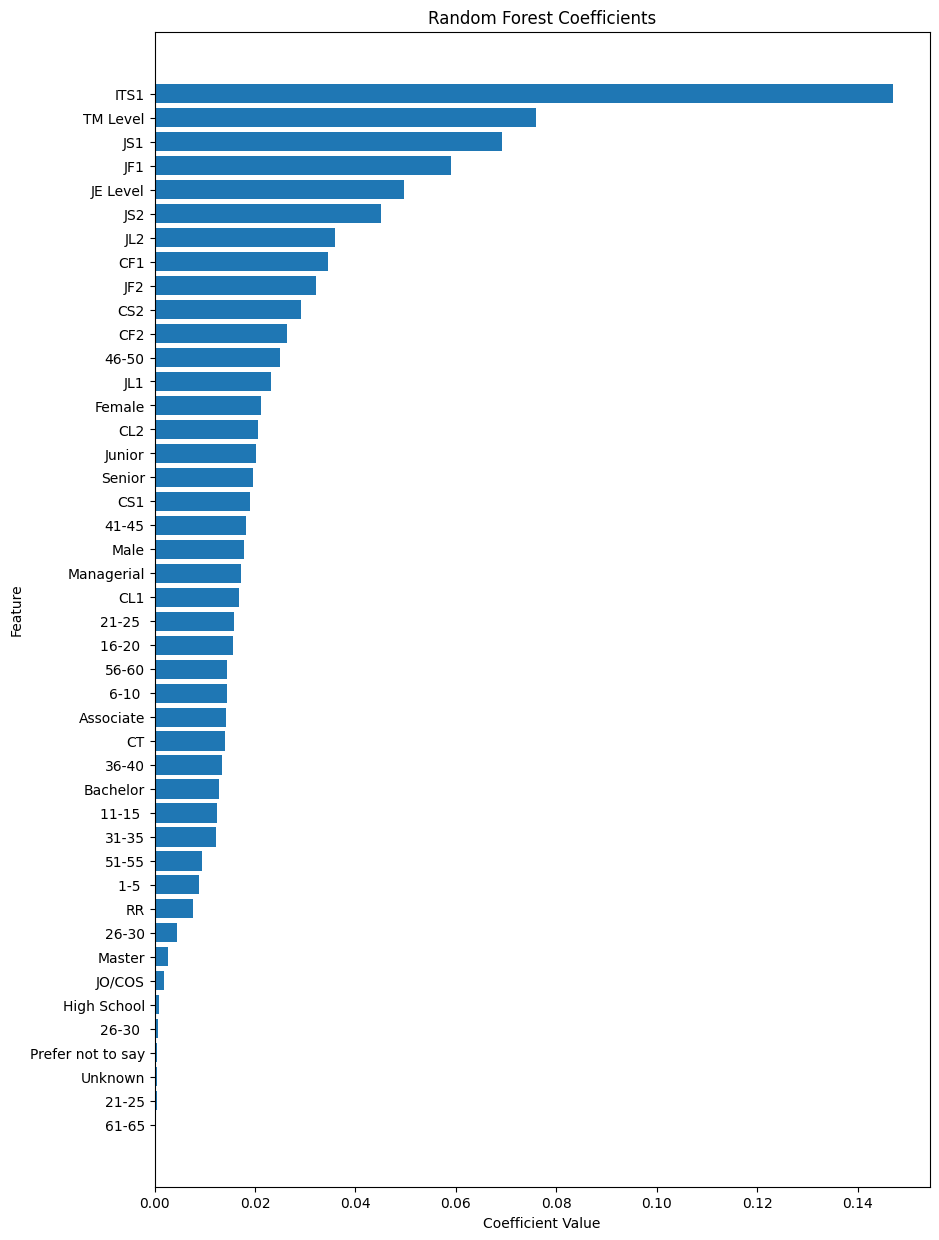

In [154]:
rfc_model_interpretation = pd.DataFrame(
    {"features": X_train.columns,
    "coefficients": rfc_model.feature_importances_}
)

rfc_model_interpretation.sort_values(by="coefficients", ascending=True, inplace=True)


plt.figure(figsize=(10, 15))
plt.barh(rfc_model_interpretation.features,
         rfc_model_interpretation.coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Random Forest Coefficients')
plt.show()

### **Model Saving**

In [155]:
# save xgb model as a pickle in the directory
import pickle
# pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))
pickle.dump(logreg_model, open('logreg_model.pkl', 'wb'))
pickle.dump(rfc_model, open('rfc_model.pkl', 'wb'))